In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
lat_min = 33;
lat_max = 42;
lon_min = -125;
lon_max = -115;

In [3]:
CAC = np.loadtxt('CA_coast_line_no_islands.txt', usecols=(0,1)) 
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1)) 
print(CAC.shape,CAB.shape)

(1282, 2) (1295, 2)


In [4]:
CAC1 = np.append( CAC,  [[lon_min,max(CAC[:,1])]],axis=0)
CAC2 = np.append( CAC1, [[lon_min,min(CAC[:,1])]],axis=0)
ocean = CAC2.copy()

In [5]:
plate = np.loadtxt('plate.txt', usecols=(0,1)) 
print(plate.shape)

(925, 2)


In [6]:
#lat_UCB = 37+52/60+19.54/3600;
#lat_LAX = 33+56/60+38.89/3600;
lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

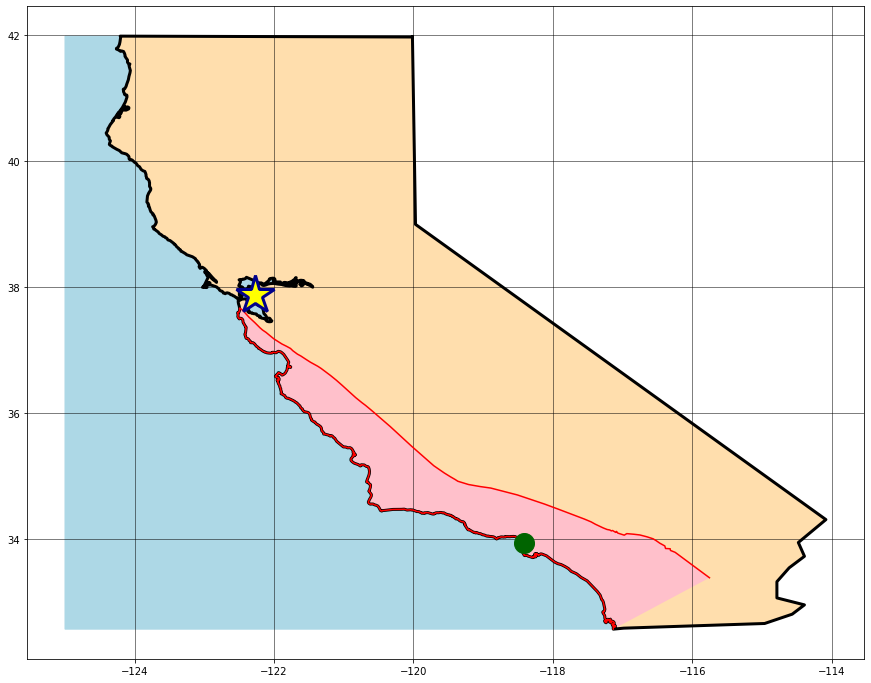

In [7]:
plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

## Part 3

**3a**

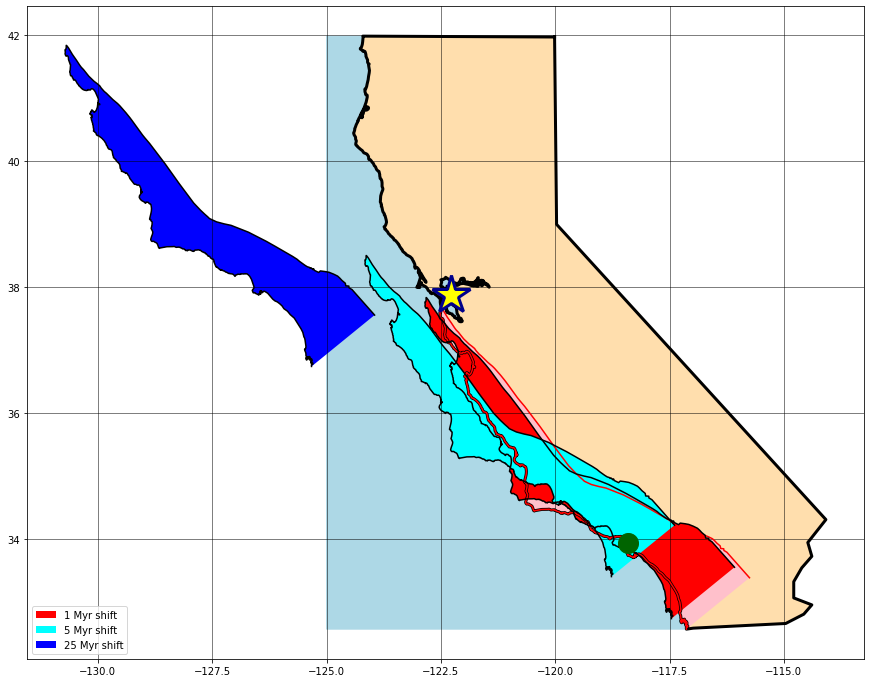

In [8]:
R=6.371e6
plate1=np.array(plate)
plate5=np.array(plate)
plate25=np.array(plate)


long_speed=.035*np.cos(np.radians(32))
lat_speed=.035*np.sin(np.radians(32))
t=10**6
lat_dist=lat_speed*t
long_dist=long_speed*t


        
for i in range(0,np.size(plate)//2):
    plate1[i,0]=plate1[i,0]*np.pi*R*np.cos(np.radians(35.5))/180-long_dist
    plate1[i,1]=plate1[i,1]*2*np.pi*R/360+lat_dist
    
for i in range(0,np.size(plate)//2):
    plate1[i,0]=plate1[i,0]/((np.pi*R*np.cos(np.radians(35.5)))/180)
    plate1[i,1]=plate1[i,1]/(2*np.pi*R/360)
    
    
t=5*10**6
lat_dist=lat_speed*t
long_dist=long_speed*t    
for i in range(0,np.size(plate)//2):
    plate5[i,0]=plate5[i,0]*np.pi*R*np.cos(np.radians(35.5))/180-long_dist
    plate5[i,1]=plate5[i,1]*2*np.pi*R/360+lat_dist
    
for i in range(0,np.size(plate)//2):
    plate5[i,0]=plate5[i,0]/((np.pi*R*np.cos(np.radians(35.5)))/180)
    plate5[i,1]=plate5[i,1]/(2*np.pi*R/360)

    
t=25*10**6
lat_dist=lat_speed*t
long_dist=long_speed*t   
for i in range(0,np.size(plate)//2):
    plate25[i,0]=plate25[i,0]*np.pi*R*np.cos(np.radians(35.5))/180-long_dist
    plate25[i,1]=plate25[i,1]*2*np.pi*R/360+lat_dist
    
for i in range(0,np.size(plate)//2):
    plate25[i,0]=plate25[i,0]/((np.pi*R*np.cos(np.radians(35.5)))/180)
    plate25[i,1]=plate25[i,1]/(2*np.pi*R/360)
    
    
        
plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')


plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(plate1[:,0],plate1[:,1],'k-')
plt.fill(plate1[:,0],plate1[:,1],'red',label='1 Myr shift')

plt.plot(plate5[:,0],plate5[:,1],'k-')
plt.fill(plate5[:,0],plate5[:,1],'cyan',label='5 Myr shift')

plt.plot(plate25[:,0],plate25[:,1],'k-')
plt.fill(plate25[:,0],plate25[:,1],'blue',label='25 Myr shift')



plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.legend()
plt.show()        


**3b**

In [11]:
plate_callax=np.array(plate)
cal_coord = (37+52/60+19.54/3600)*2*np.pi*R/360
lax_coord = (33+56/60+38.89/3600)*2*np.pi*R/360

times = [23,23.5,24,24.5,25,25.5]

for i in range(len(times)):
    lat_dist=lat_speed*times[i]*10**6
    new_lax_coord=lax_coord+lat_dist
    #print(new_lax_coord)
    if new_lax_coord<=cal_coord*1.001 and new_lax_coord>= cal_coord*0.999:
        time_arrive=times[i]

print(time_arrive,'Myr')

23.5 Myr
